In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def map_cols(df, col_pos):
    sortlist = ["Invalid", "Too High", "Too Low", "Valid"]
    df = df.copy()
    df[col_mz] = df[col_mass] / df[col_pos]
    df[col_valid_mz] = "Valid"
    df.loc[df[col_mz] > mz_range_max, col_valid_mz] = "Too High"
    df.loc[df[col_mz] < mz_range_min, col_valid_mz] = "Too Low"
    df.loc[(df[col_pos] == 0) | (df[col_pos] == 1) | (df[col_pos] > 8), col_valid_mz] = "Invalid"
    df[col_valid_mz] = pd.Categorical(
        df[col_valid_mz],
        categories=sortlist,
        ordered=True
    )
    return df
    #df[col_valid_mz] = (df[col_mz] <= mz_range_max) & (df[col_mz] >= mz_range_min)

In [3]:
df = pd.read_csv("input_enzymes.csv")

In [4]:
df

,Protein,Missed Cleavages Max,Enzyme,Mass,Position,Missed Clevages,Sequence
0,RhoA,2,Trypsin,8151.8881,28-98,2,DQFPEVYVPTVFENYVADIE VDGKQVELALWDTAGQEDYD RLRP...
1,RhoA,2,Trypsin,6137.9674,52-104,2,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENI...
2,RhoA,2,Trypsin,5767.8039,19-68,2,TCLLIVFSKDQFPEVYVPTV FENYVADIEVDGKQVELALW DTAG...
3,RhoA,2,Trypsin,5679.8939,69-118,2,LRPLSYPDTDVILMCFSIDS PDSLENIPEKWTPEVKHFCP NVPI...
4,RhoA,2,Trypsin,5397.5817,52-98,1,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENIPEK
...,...,...,...,...,...,...,...
723,Eg5,2,Asp N / Glu C,602.2892,119-123,0,RSPNE
724,Eg5,2,Asp N / Glu C,598.2507,125-128,0,YTWE
725,Eg5,2,Asp N / Glu C,591.2620,265-270,0,DLAGSE
726,Eg5,2,Asp N / Glu C,538.2507,163-166,0,IYNE


In [6]:
folder_plots = 'plots_enzyme'

In [7]:
mz_range_min = 350
mz_range_max = 1500

In [426]:
col_prot = "Protein"
col_mc_max = "Missed Cleavages Max"
col_mc = "Missed Cleavages"
col_mass = "Mass"
col_pos = "Position"
col_seq_pep = "Sequence"
col_seq_prot = "Protein Sequence"
col_seq_cov = "Sequence Coverage"
col_pep_count = "Peptide Count"
col_pep_count_frac = "Peptide Count Fraction"
col_pep_count_total = "Peptide Count Total"
col_mz = "m/z"
col_valid_mz = "valid m/z range"
col_ref = 'Positive Charges'
col_enzyme = 'Enzyme'
col_pos_count_rh = "Sum Pos (R,H)"
col_pos_count_rhnt = "Sum Pos (R,H,N-T)"
col_pos_count_all = "Sum Pos (R,H,N-T,K)"
col_lys_count = "Sum Lys"
col_lys_cov = "Lys Coverage"
col_lys_cov_rel = "Lys Coverage Fraction"
col_lys_total = "Lys Total"
col_lys_mean = "Lys Mean Per Petide"
col_lys_non_covered = "Non-covered Lys Pos"

In [8]:
aa_lys = "K"

In [11]:
aa_pos_list = ["R", "H"]
aa_pos_regex = "|".join(aa_pos_list)
aa_pos_regex

'R|H'

In [12]:
df[col_lys_count] = df[col_seq].str.count(aa_lys)
df[col_pos_count_rh] = df[col_seq].str.count(aa_pos_regex)
df[col_pos_count_rhnt] = df[col_pos_count_rh] + 1
df[col_pos_count_all] = df[col_pos_count_rhnt] + df[col_lys_count]

In [13]:
df

,Protein,Missed Cleavages Max,Enzyme,Mass,Position,Missed Clevages,Sequence,Sum Lys,"Sum Pos (R,H)","Sum Pos (R,H,N-T)","Sum Pos (R,H,N-T,K)"
0,RhoA,2,Trypsin,8151.8881,28-98,2,DQFPEVYVPTVFENYVADIE VDGKQVELALWDTAGQEDYD RLRP...,2,2,3,5
1,RhoA,2,Trypsin,6137.9674,52-104,2,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENI...,2,2,3,5
2,RhoA,2,Trypsin,5767.8039,19-68,2,TCLLIVFSKDQFPEVYVPTV FENYVADIEVDGKQVELALW DTAG...,2,1,2,4
3,RhoA,2,Trypsin,5679.8939,69-118,2,LRPLSYPDTDVILMCFSIDS PDSLENIPEKWTPEVKHFCP NVPI...,3,2,3,6
4,RhoA,2,Trypsin,5397.5817,52-98,1,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENIPEK,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...
723,Eg5,2,Asp N / Glu C,602.2892,119-123,0,RSPNE,0,1,2,2
724,Eg5,2,Asp N / Glu C,598.2507,125-128,0,YTWE,0,0,1,1
725,Eg5,2,Asp N / Glu C,591.2620,265-270,0,DLAGSE,0,0,1,1
726,Eg5,2,Asp N / Glu C,538.2507,163-166,0,IYNE,0,0,1,1


In [292]:
class MyDict(dict):
    pass
    
    
def get_aa_dict(seq, name="MyProt"):
    aa_dict = MyDict()
    aa_dict.name = name
    aa_dict.seq = seq
    for n, aa in enumerate(seq):
        aa_dict[n+1] = AminoAcid(aa)
    return aa_dict

        
class AminoAcid(object):
    def __init__(self, aa):
        self.aa = aa
        self.is_covered = False
        
    def set_covered(self, is_covered):
        self.is_covered = is_covered
    
    def __repr__(self):
        return self.aa
    
    def __add__(self, other):
        return self.is_covered + other
    def __radd__(self, other):
        if other == 0:
            return self.is_covered
        else:
            return self.__add__(other)

In [293]:
aa_dict = get_aa_dict(seq_rhoa)

In [427]:
def get_seq_cov_df(df):
    
    def get_cov(x, seq):
        seq = seq.iloc[0]
        seq_map = get_aa_dict(seq)#{k+1:False for k in range(len(seq))}
        peps = x.iloc[0]
        lys_covered = 0
        lys_pos_non_covered_set = set()
        for pep in peps:
            pep = pep.replace(" ", "")
            start = seq.find(pep) + 1
            # end will overshoot by one
            # but it is fine as range goes to end-1
            end = start + len(pep)
            for n in range(start, end):
                seq_map[n].set_covered(True)
                #seq_map[n] = True
        sum_covered = sum(seq_map.values())
        for pos in seq_map.keys():
            if seq_map[pos].is_covered and seq_map[pos].aa == 'K':
                lys_covered += 1
            elif not seq_map[pos].is_covered and seq_map[pos].aa == 'K':
                lys_pos_non_covered_set.add(pos)
        return pd.Series({col_lys_cov: lys_covered, col_lys_non_covered: sorted(list(lys_pos_non_covered_set))})#sum_covered/len(seq)
    
    groupby = [col_prot, col_mc_max, col_enzyme]
    if col_valid_mz in df:
        df = df[df[col_valid_mz] == 'Valid']
    seq_rhoa = 'MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADIEVDGKQVELALWDTAGQEDYDRLRPLSYPDTDVILMCFSIDSPDSLENIPEKWTPEVKHFCPNVPIILVGNKKDLRNDEHTRRELAKMKQEPVKPEEGRDMANRIGAFGYMECSAKTKDGVREVFEMATRAALQARRGKKKSGCLVL'
    seq_eg5 = 'MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPVRKEVSVRTGGLADKSSRKTYTFDMVFGASTKQIDVYRSVVCPILDEVIMGYNCTIFAYGQTGTGKTFTMEGERSPNEEYTWEEDPLAGIIPRTLHQIFEKLTDNGTEFSVKVSLLEIYNEELFDLLNPSSDVSERLQMFDDPRNKRGVIIKGLEEITVHNKDEVYQILEKGAAKRTTAATLMNAYSSRSHSVFSVTIHMKETTIDGEELVKIGKLNLVDLAGSENIGRSGAVDKRAREAGNINQSLLTLGRVITALVERTPHVPYRESKLTRILQDSLGGRTRTSIIATISPASLNLEETLSTLEYAHRAKNILNKPEVNQKLT'
    df_seqs = df.groupby(groupby)[col_seq].apply(list).reset_index()
    df_seqs.loc[df_seqs[col_prot] == 'RhoA', col_seq_prot] = seq_rhoa
    df_seqs.loc[df_seqs[col_prot] == 'Eg5', col_seq_prot] = seq_eg5
    df_seqs[col_lys_total] = df_seqs[col_seq_prot].str.count("K")
    df_f = df_seqs.groupby([col_prot, col_mc_max, col_enzyme, col_lys_total]).apply(lambda x: get_cov(x[col_seq_pep], x[col_seq_prot])).reset_index()
    df_f[col_lys_cov_rel] = df_f[col_lys_cov]/df_f[col_lys_total]
    
    return df_f

In [428]:
get_seq_cov_df(df)

,Protein,Missed Cleavages Max,Enzyme,Lys Total,Lys Coverage,Non-covered Lys Pos,Lys Coverage Fraction
0,Eg5,2,Asp N / Glu C,26,26,[],1.0
1,Eg5,2,Chymotrypsin,26,26,[],1.0
2,Eg5,2,Trypsin,26,26,[],1.0
3,Eg5,2,Trypsin/Chymotrypsin,26,26,[],1.0
4,RhoA,2,Asp N / Glu C,17,17,[],1.0
5,RhoA,2,Chymotrypsin,17,17,[],1.0
6,RhoA,2,Trypsin,17,17,[],1.0
7,RhoA,2,Trypsin/Chymotrypsin,17,17,[],1.0


In [353]:
df_lys_only = df[df[col_lys_count] > 0].reset_index(drop=True)

In [329]:
df_lys_only

,Protein,Missed Cleavages Max,Enzyme,Mass,Position,Missed Clevages,Sequence,Sum Lys,"Sum Pos (R,H)","Sum Pos (R,H,N-T)","Sum Pos (R,H,N-T,K)",seq,Protein Sequence
0,RhoA,2,Trypsin,8151.8881,28-98,2,DQFPEVYVPTVFENYVADIE VDGKQVELALWDTAGQEDYD RLRP...,2,2,3,5,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...
1,RhoA,2,Trypsin,6137.9674,52-104,2,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENI...,2,2,3,5,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...
2,RhoA,2,Trypsin,5767.8039,19-68,2,TCLLIVFSKDQFPEVYVPTV FENYVADIEVDGKQVELALW DTAG...,2,1,2,4,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...
3,RhoA,2,Trypsin,5679.8939,69-118,2,LRPLSYPDTDVILMCFSIDS PDSLENIPEKWTPEVKHFCP NVPI...,3,2,3,6,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...
4,RhoA,2,Trypsin,5397.5817,52-98,1,QVELALWDTAGQEDYDRLRP LSYPDTDVILMCFSIDSPDS LENIPEK,1,2,3,4,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...,MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Eg5,2,Asp N / Glu C,840.4574,201-207,1,EITVHNK,1,1,2,3,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...
470,Eg5,2,Asp N / Glu C,774.4216,279-284,0,DKRARE,1,2,3,4,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...
471,Eg5,2,Asp N / Glu C,743.4046,44-49,0,DPVRKE,1,1,2,3,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...
472,Eg5,2,Asp N / Glu C,711.4148,202-207,0,ITVHNK,1,1,2,3,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...,MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPV...


In [400]:
def create_charge_compare_df(df_rh, df_rhnt, df_all):
    df_rh[col_ref] = "R, H"
    df_rhnt[col_ref] = "R, H, N-T"
    df_all[col_ref] = "R, H, N-T, K"
    df_merge = pd.concat([df_rh, df_rhnt, df_all]).reset_index(drop=True)
    sortlist = ["R, H", "R, H, N-T", "R, H, N-T, K"]
    df_merge[col_ref] = pd.Categorical(
        df_merge[col_ref],
        categories=sortlist,
        ordered=True
    )
    return df_merge

In [401]:
df_cov_rh = get_seq_cov_df(map_cols(df_lys_only, col_pos_count_rh))
df_cov_rhnt = get_seq_cov_df(map_cols(df_lys_only, col_pos_count_rhnt))
df_cov_all = get_seq_cov_df(map_cols(df_lys_only, col_pos_count_all))
df_cov_compare = create_charge_compare_df(df_cov_rh, df_cov_rhnt, df_cov_all)

In [407]:
df_cov_rh

,Protein,Missed Cleavages Max,Enzyme,Lys Total,Lys Coverage,Non-covered Lys Pos,Lys Coverage Fraction,Positive Charges
0,Eg5,2,Asp N / Glu C,26,18,"[10, 11, 12, 77, 111, 157, 257, 260]",0.692308,"R, H"
1,Eg5,2,Chymotrypsin,26,17,"[77, 111, 146, 157, 246, 257, 260, 280, 315]",0.653846,"R, H"
2,Eg5,2,Trypsin,26,15,"[10, 11, 12, 15, 64, 77, 111, 157, 216, 362, 368]",0.576923,"R, H"
3,Eg5,2,Trypsin/Chymotrypsin,26,15,"[10, 11, 12, 15, 64, 77, 111, 157, 216, 220, 260]",0.576923,"R, H"
4,RhoA,2,Asp N / Glu C,17,11,"[6, 7, 18, 27, 51, 98]",0.647059,"R, H"
5,RhoA,2,Chymotrypsin,17,12,"[6, 7, 18, 27, 51]",0.705882,"R, H"
6,RhoA,2,Trypsin,17,7,"[6, 7, 18, 27, 51, 98, 104, 162, 186, 187]",0.411765,"R, H"
7,RhoA,2,Trypsin/Chymotrypsin,17,5,"[6, 7, 18, 27, 51, 98, 104, 118, 162, 164, 186...",0.294118,"R, H"


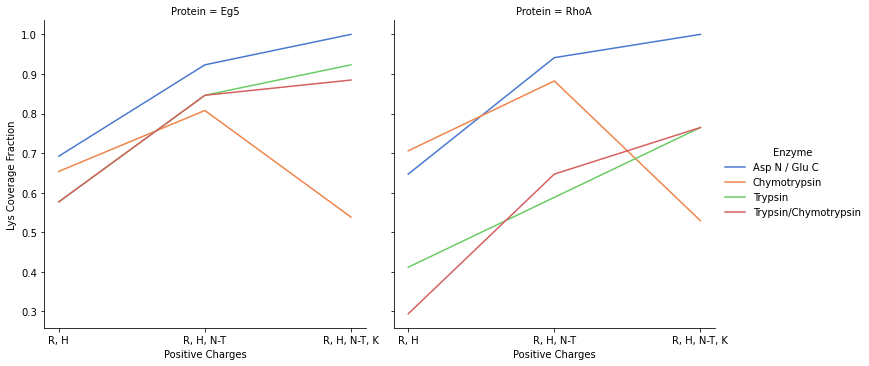

In [444]:
fg_lys_cov = sns.relplot(data=df_cov_compare, kind='line', x=col_ref, y=col_lys_cov_rel, hue=col_enzyme, palette='muted', col=col_prot) #facet_kws={'sharey':False}

In [435]:
df_cov_rh_exploded = df_cov_rh.explode(col_lys_non_covered).reset_index(drop=True)

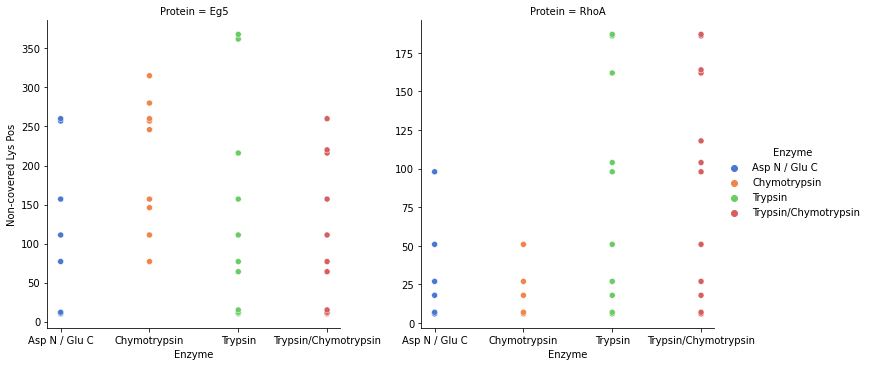

In [445]:
fg_lys_rh_non_covered = sns.relplot(data=df_cov_rh_exploded, kind='scatter', y=col_lys_non_covered, x=col_enzyme, hue=col_enzyme, palette='muted', col=col_prot, facet_kws={'sharey':False})

In [414]:
df_lys_per_pep_rh = map_cols(df_lys_only, col_pos_count_rh).groupby([col_prot, col_mc_max, col_enzyme, col_valid_mz])[col_lys_count].mean().reset_index(name=col_lys_mean)

In [415]:
df_lys_per_pep_rh = df_lys_per_pep_rh[df_lys_per_pep_rh[col_valid_mz] == 'Valid']

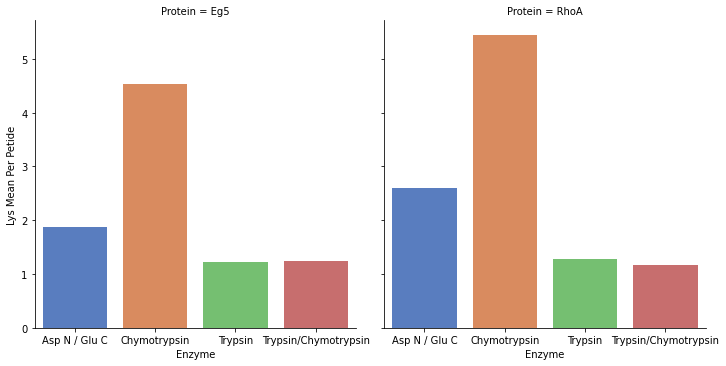

In [446]:
fg_lys_per_peptide_rh = sns.catplot(data=df_lys_per_pep_rh, kind='bar', x=col_enzyme, y=col_lys_mean, palette='muted', col=col_prot, facet_kws={'sharey':False})

In [388]:
palette = {"Too High": "#e03a5c", "Invalid": "#af0c2d", "Too Low": "#e36d5a", "Valid": "#49ab4d"}

In [38]:
#sns.displot(df, kind='hist', x=col_pos_count, hue=col_valid_mz, col=col_mc_max, row=col_prot, discrete=True, multiple="stack", palette=palette) # multiple="dodge",

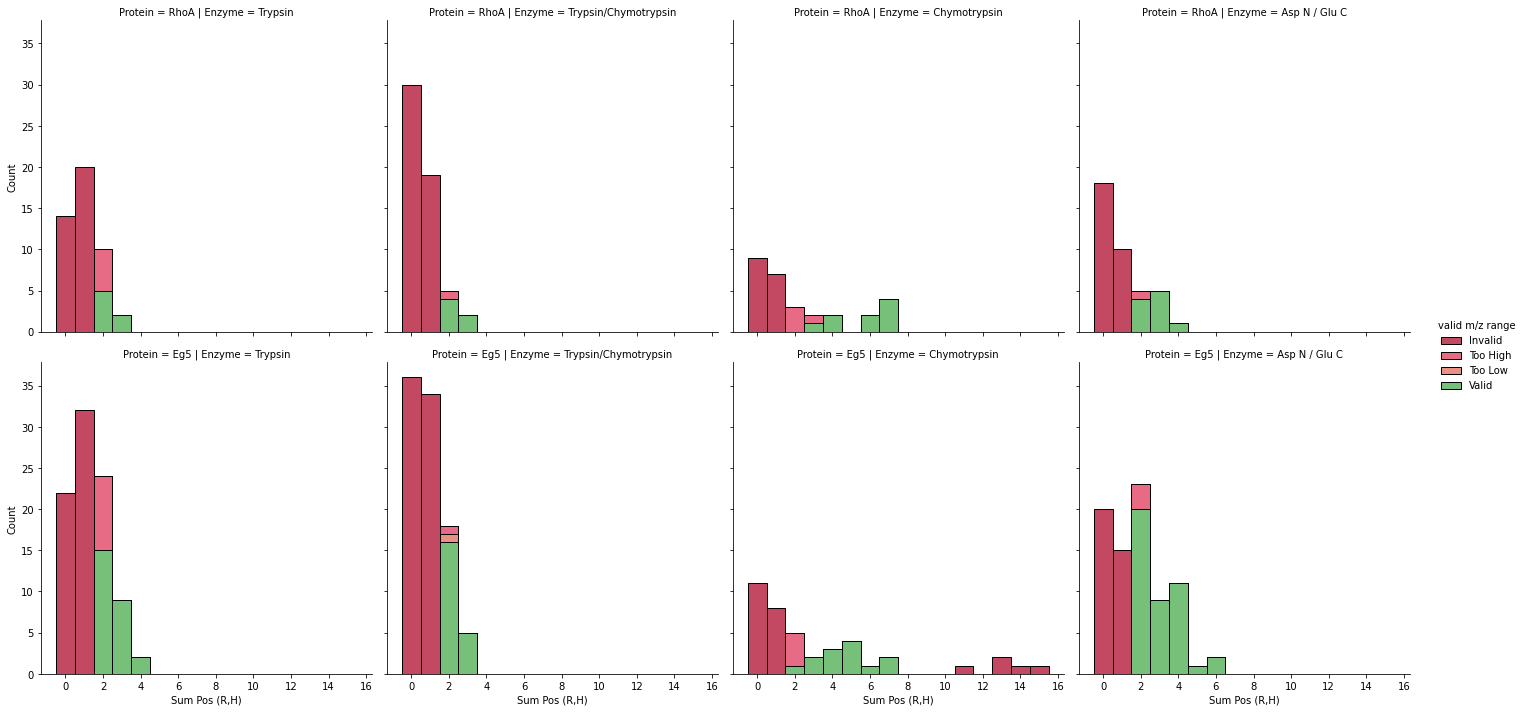

In [36]:
fg_lys_only_rh = sns.displot(map_cols(df_lys_only, col_pos_count_rh), kind='hist', x=col_pos_count_rh, hue=col_valid_mz, col=col_enzyme, row=col_prot, discrete=True, multiple="stack", palette=palette) # multiple="dodge",

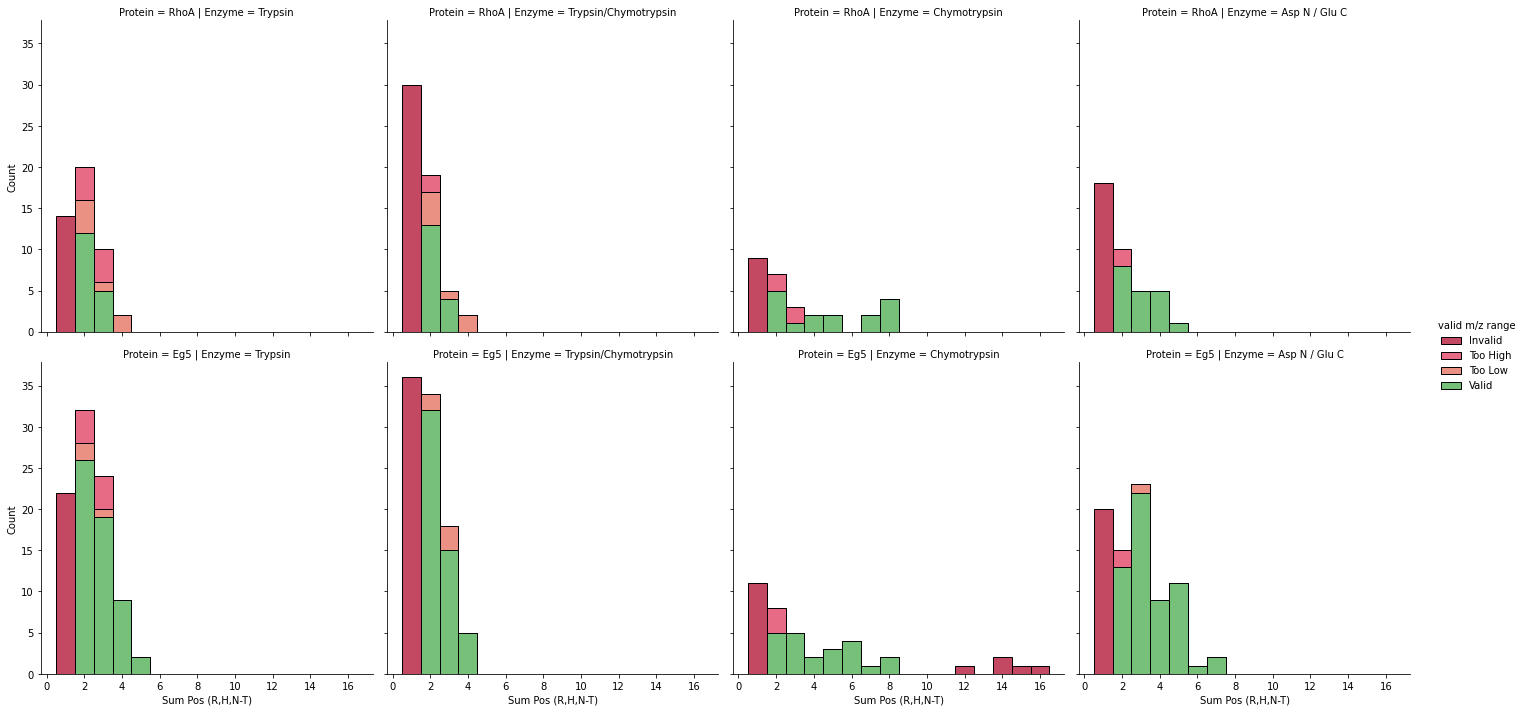

In [38]:
fg_lys_only_rhnt = sns.displot(map_cols(df_lys_only, col_pos_count_rhnt), kind='hist', x=col_pos_count_rhnt, hue=col_valid_mz, col=col_enzyme, row=col_prot, discrete=True, palette=palette, multiple="stack") # multiple="dodge",

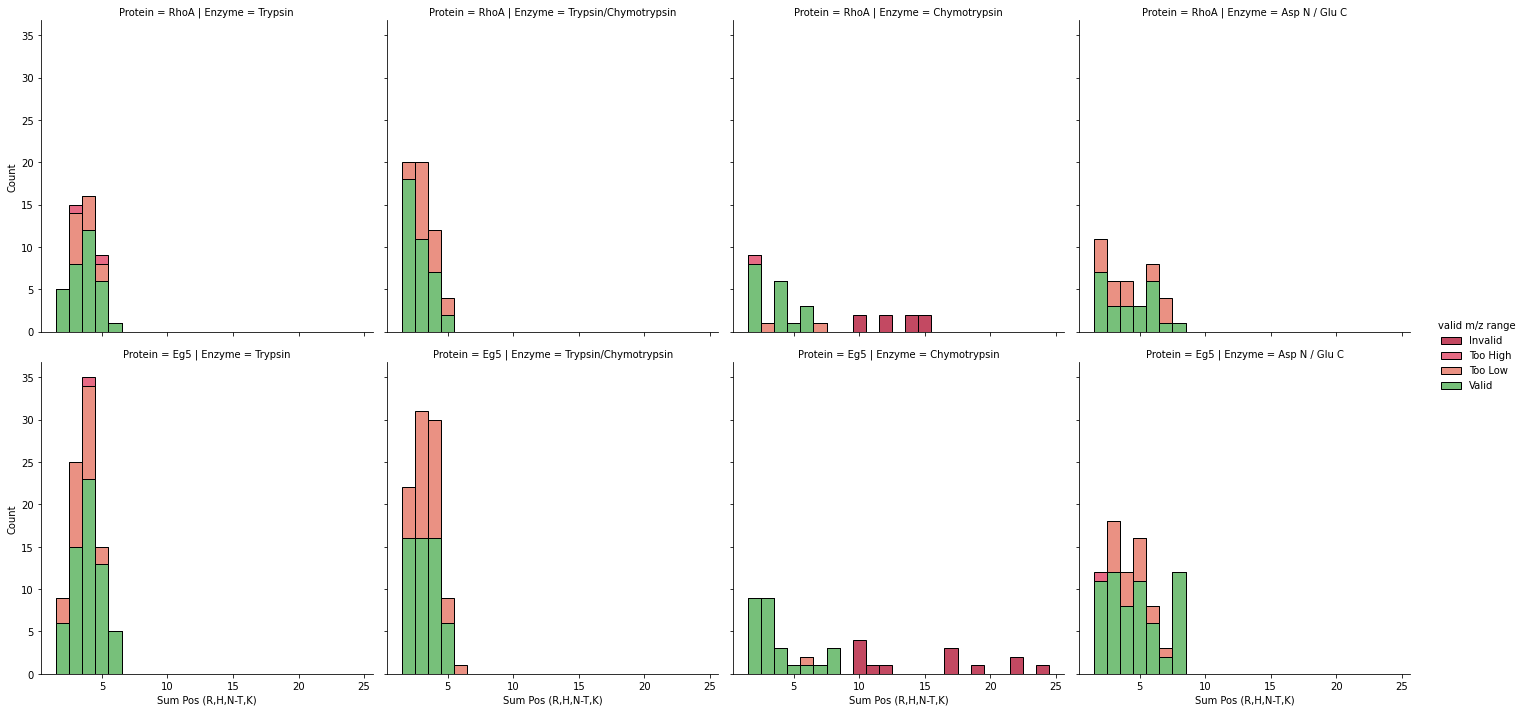

In [39]:
fg_lys_only_all = sns.displot(map_cols(df_lys_only, col_pos_count_all), kind='hist', x=col_pos_count_all, hue=col_valid_mz, col=col_enzyme, row=col_prot, discrete=True, palette=palette, multiple="stack") # multiple="dodge",

In [384]:
df_vc_0 = map_cols(df_lys_only, col_pos_count_rh).groupby([col_enzyme, col_prot, col_mc_max])[col_valid_mz].value_counts().reset_index(name=col_pep_count)
df_vc_1 = map_cols(df_lys_only, col_pos_count_rhnt).groupby([col_enzyme, col_prot, col_mc_max])[col_valid_mz].value_counts().reset_index(name=col_pep_count)
df_vc_2 = map_cols(df_lys_only, col_pos_count_all).groupby([col_enzyme, col_prot, col_mc_max])[col_valid_mz].value_counts().reset_index(name=col_pep_count)

In [392]:
df_vc_ov = create_charge_compare_df(df_vc_0, df_vc_1, df_vc_2)

In [393]:
df_vc_ov

,Enzyme,Protein,Missed Cleavages Max,valid m/z range,Peptide Count,Positive Charges
0,Asp N / Glu C,Eg5,2,Valid,43,"R, H"
1,Asp N / Glu C,Eg5,2,Invalid,35,"R, H"
2,Asp N / Glu C,Eg5,2,Too High,3,"R, H"
3,Asp N / Glu C,RhoA,2,Invalid,28,"R, H"
4,Asp N / Glu C,RhoA,2,Valid,10,"R, H"
...,...,...,...,...,...,...
70,Trypsin,RhoA,2,Too High,2,"R, H, N-T, K"
71,Trypsin/Chymotrypsin,Eg5,2,Valid,54,"R, H, N-T, K"
72,Trypsin/Chymotrypsin,Eg5,2,Too Low,39,"R, H, N-T, K"
73,Trypsin/Chymotrypsin,RhoA,2,Valid,38,"R, H, N-T, K"


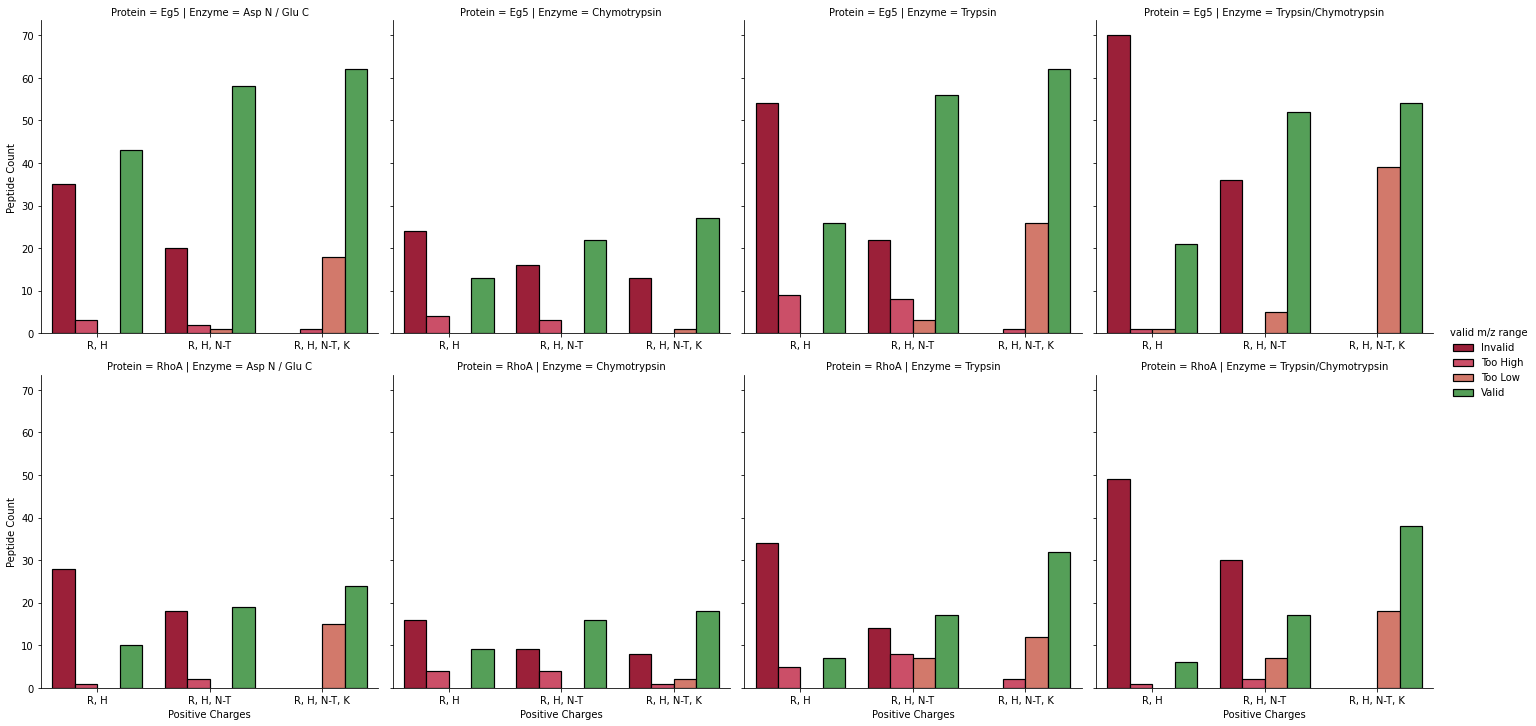

In [424]:
fg_lys_only_ov = sns.catplot(data=df_vc_ov, kind='bar', x=col_ref, y=col_pep_count, hue=col_valid_mz, row=col_prot, col=col_enzyme, palette=palette, sharey=True, sharex=False,linewidth=1.2, edgecolor="black") # multiple="dodge",

In [418]:
df_valid_only_mc_2 = df_vc_ov[(df_vc_ov[col_valid_mz] == 'Valid') & (df_vc_ov[col_mc_max] == 2)].sort_values([col_prot])
df_valid_only_mc_2

,Enzyme,Protein,Missed Cleavages Max,valid m/z range,Peptide Count,Positive Charges
0,Asp N / Glu C,Eg5,2,Valid,43,"R, H"
7,Chymotrypsin,Eg5,2,Valid,13,"R, H"
65,Trypsin,Eg5,2,Valid,62,"R, H, N-T, K"
13,Trypsin,Eg5,2,Valid,26,"R, H"
19,Trypsin/Chymotrypsin,Eg5,2,Valid,21,"R, H"
58,Chymotrypsin,Eg5,2,Valid,27,"R, H, N-T, K"
25,Asp N / Glu C,Eg5,2,Valid,58,"R, H, N-T"
32,Chymotrypsin,Eg5,2,Valid,22,"R, H, N-T"
71,Trypsin/Chymotrypsin,Eg5,2,Valid,54,"R, H, N-T, K"
38,Trypsin,Eg5,2,Valid,56,"R, H, N-T"


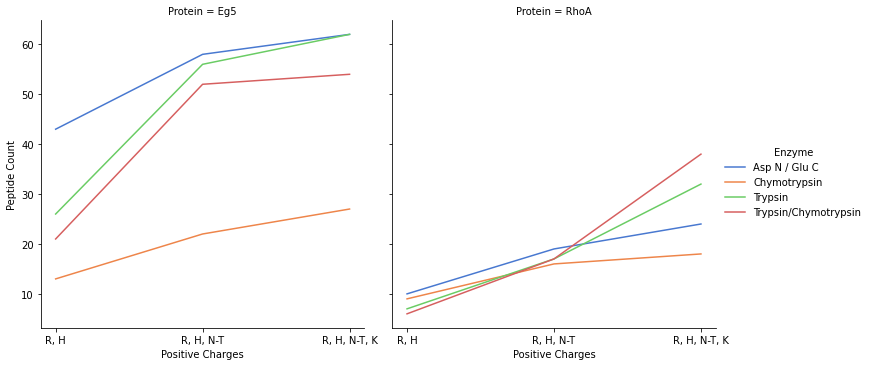

In [419]:
fg_lys_only_ov_valid = sns.relplot(data=df_valid_only_mc_2, kind='line', x=col_ref, y=col_pep_count, col=col_prot, palette='muted', hue=col_enzyme) # multiple="dodge",

In [420]:
df_count_max = df_vc_ov.groupby([col_enzyme, col_prot, col_mc_max, col_ref]).sum().reset_index().drop(columns=[col_ref]).drop_duplicates().reset_index(drop=True).rename(columns={col_pep_count: col_pep_count_total})
df_count_max

,Enzyme,Protein,Missed Cleavages Max,Peptide Count Total
0,Asp N / Glu C,Eg5,2,81
1,Asp N / Glu C,RhoA,2,39
2,Chymotrypsin,Eg5,2,41
3,Chymotrypsin,RhoA,2,29
4,Trypsin,Eg5,2,89
5,Trypsin,RhoA,2,46
6,Trypsin/Chymotrypsin,Eg5,2,93
7,Trypsin/Chymotrypsin,RhoA,2,56


In [421]:
df_valid_only_mc_2 = pd.merge(df_valid_only_mc_2, df_count_max)
df_valid_only_mc_2[col_pep_count_frac] = df_valid_only_mc_2[col_pep_count]/df_valid_only_mc_2[col_pep_count_total]

In [422]:
df_valid_only_mc_2.head(3)

,Enzyme,Protein,Missed Cleavages Max,valid m/z range,Peptide Count,Positive Charges,Peptide Count Total,Peptide Count Fraction
0,Asp N / Glu C,Eg5,2,Valid,43,"R, H",81,0.530864
1,Asp N / Glu C,Eg5,2,Valid,58,"R, H, N-T",81,0.716049
2,Asp N / Glu C,Eg5,2,Valid,62,"R, H, N-T, K",81,0.765432


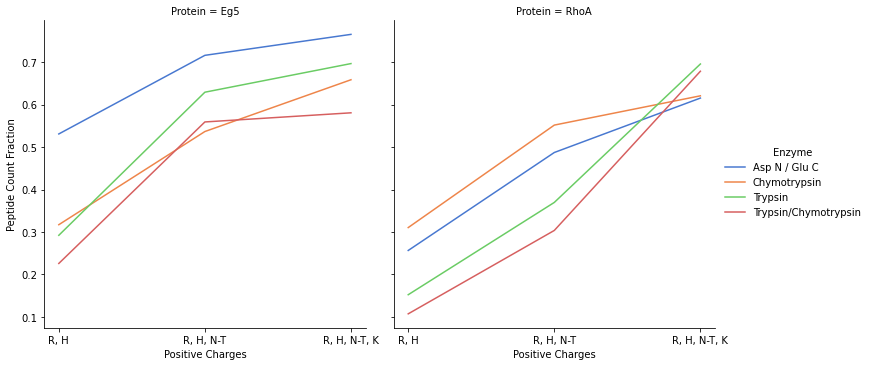

In [423]:
fg_lys_only_ov_valid_rel = sns.relplot(data=df_valid_only_mc_2, kind='line', x=col_ref, y=col_pep_count_frac, col=col_prot, palette='muted', hue=col_enzyme) # multiple="dodge",

In [425]:
fg_lys_only_ov.savefig(folder_plots + "/lys_only_ov.png")
fg_lys_only_ov_valid.savefig(folder_plots + "/lys_only_ov_only_valid.png")
fg_lys_only_ov_valid_rel.savefig(folder_plots + "/lys_only_ov_only_valid_rel.png")

In [64]:
fg_lys_only_rh.savefig(folder_plots + "/lys_only_plus_rh.png")
fg_lys_only_rhnt.savefig(folder_plots + "/lys_only_plus_rhnt.png")
fg_lys_only_all.savefig(folder_plots + "/lys_only_plus_all.png")

In [447]:
fg_lys_cov.savefig(folder_plots + "/lys_only_coverage.png")
fg_lys_per_peptide_rh.savefig(folder_plots + "/lys_only_per_pep_rh.png")
fg_lys_rh_non_covered.savefig(folder_plots + "/lys_only_non_covered_rh.png")